In [1]:
import numpy as np
import matplotlib.pyplot as plt

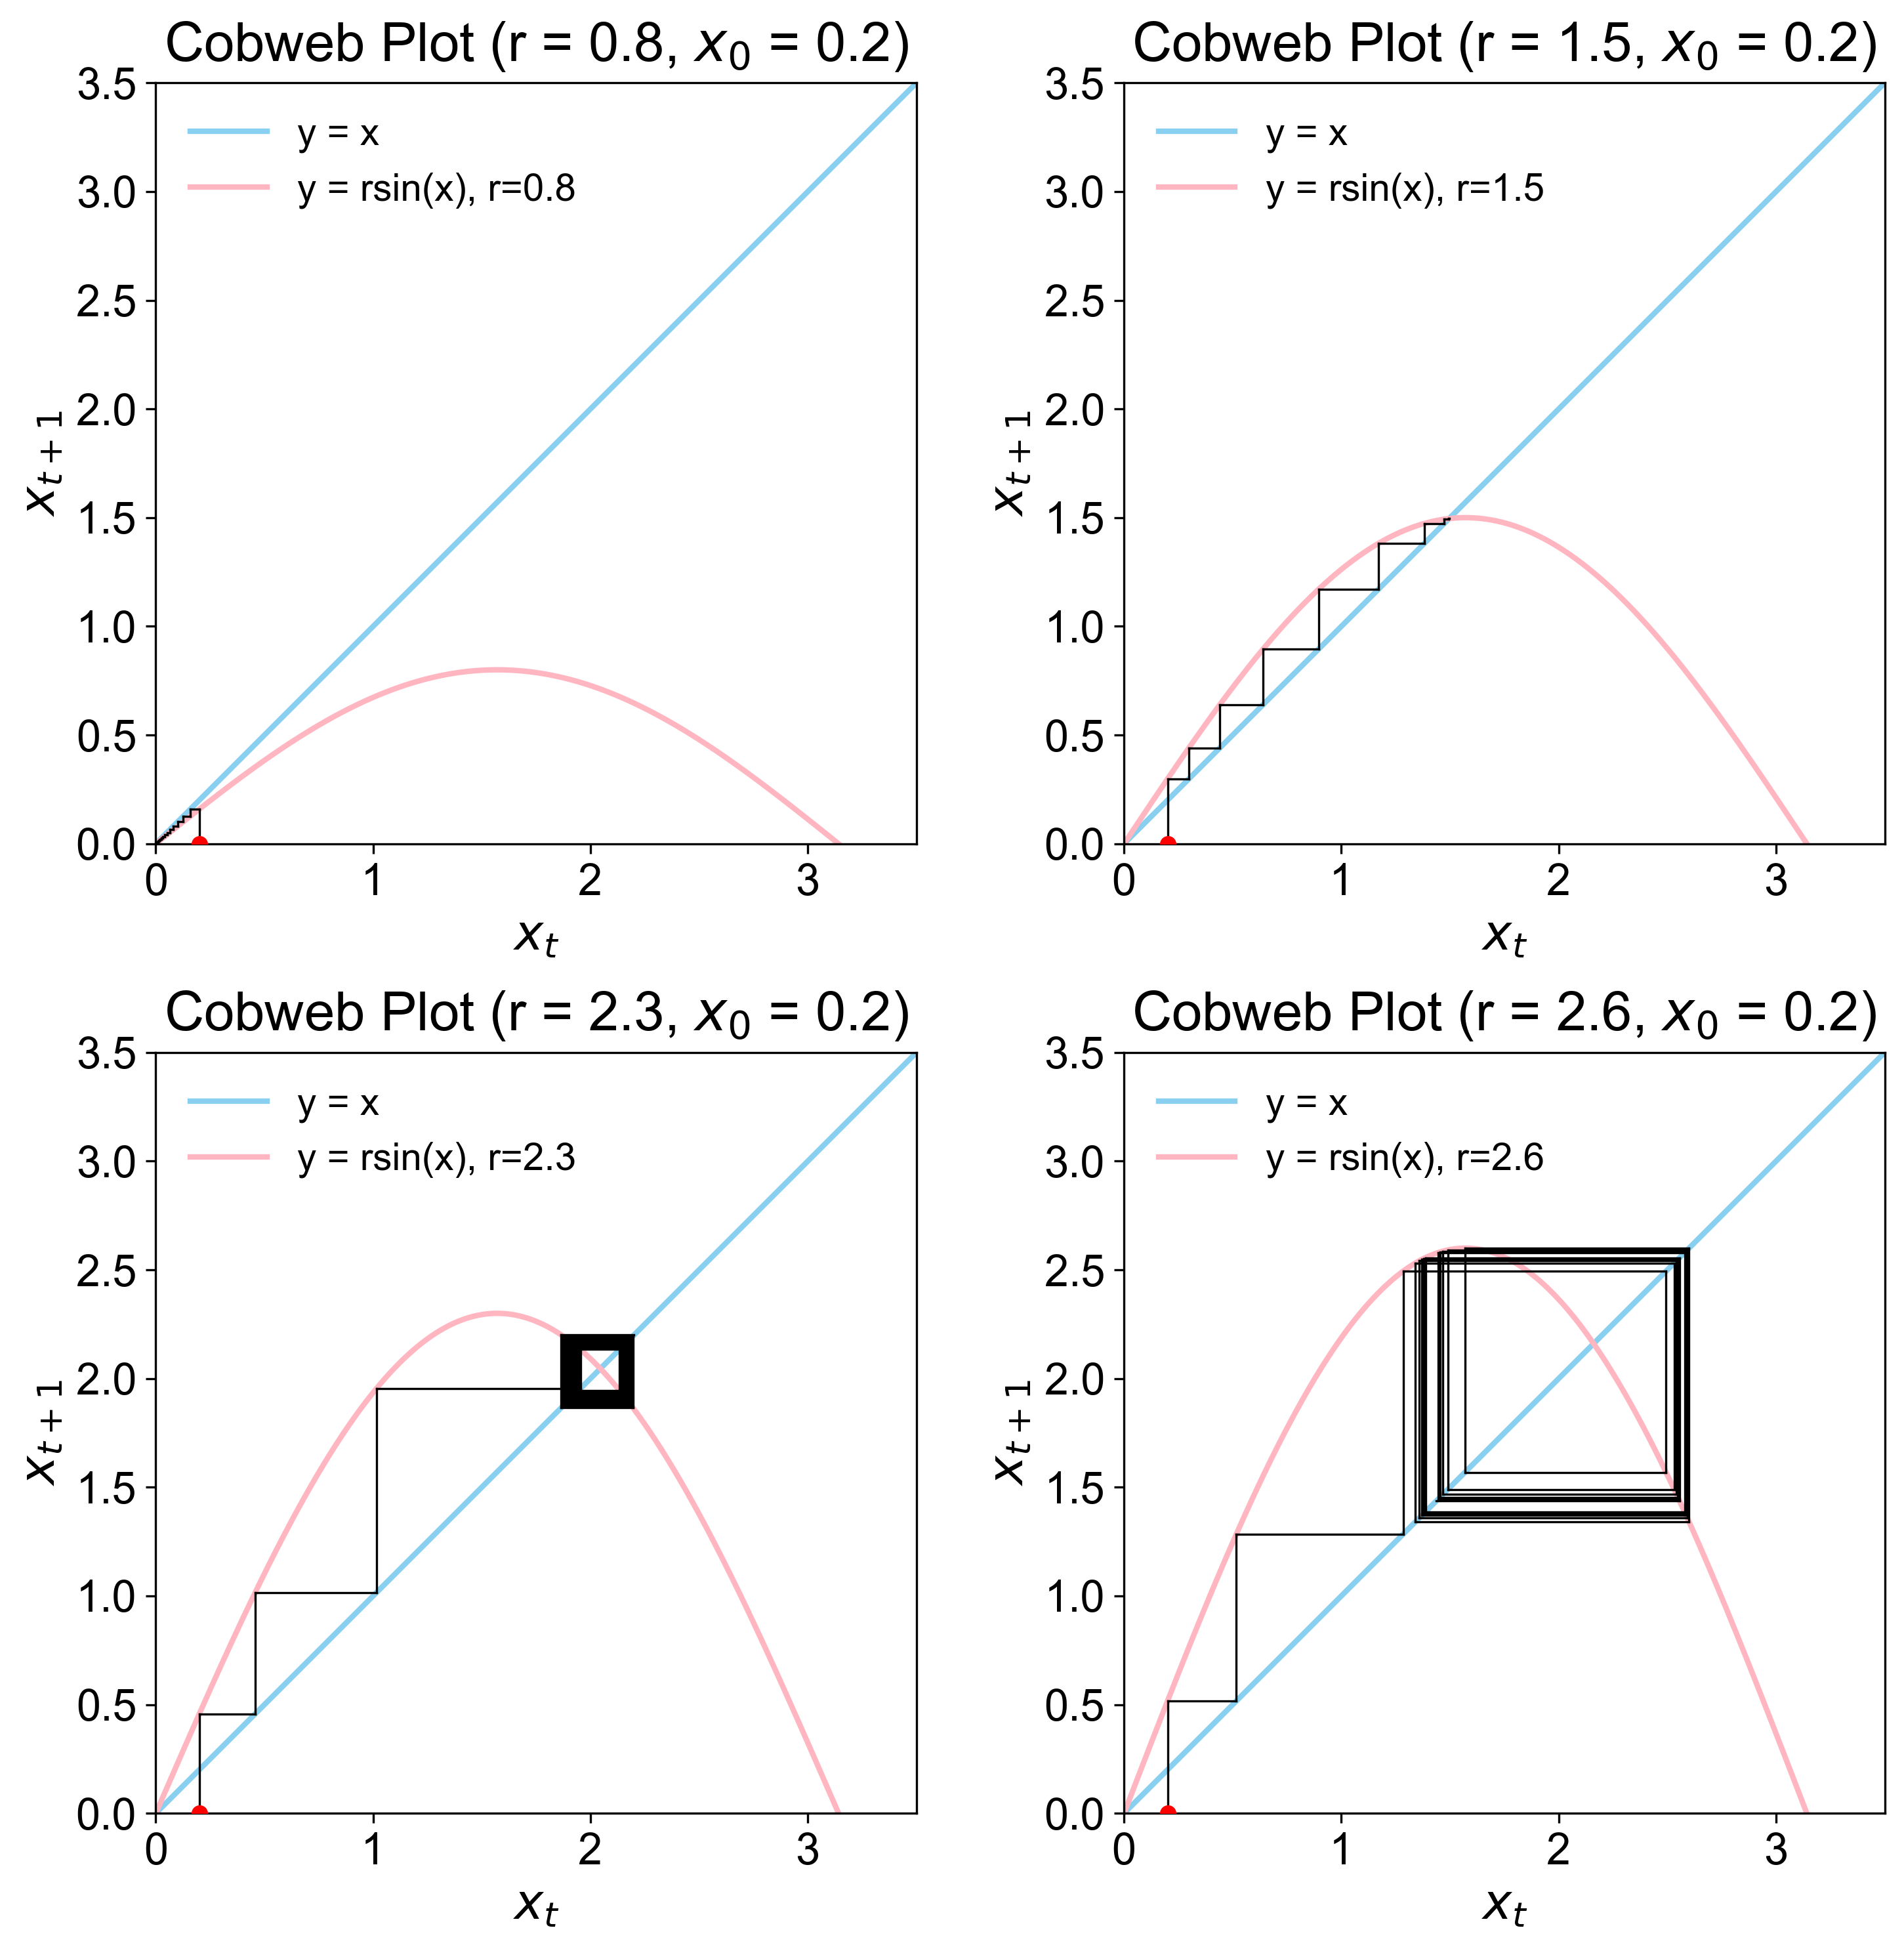

In [ ]:
# ---------- Global style ----------
plt.rcParams['font.family'] = 'Arial'

# ---------- System / simulation ----------
x0 = 0.2
steps = 300            # total iterations (logic may stop earlier)
visible_steps = 24     # how many cobweb "stair" segments to draw
tol = 1e-6             # early-stop tolerance for convergence / short cycles
positive_only = True   # keep xt >= 0

def F(x, r):
    return r * np.sin(x)

def initialize(r_value):
    global x, r, result_x, result_y, time
    r = r_value
    x = float(x0)
    result_x = [x]
    result_y = [F(x, r)]
    time = [0]

def observe():
    global x, r, result_x, result_y, time
    result_x.append(x)
    result_y.append(F(x, r))
    time.append(len(time))

def update():
    global x, r
    nextx = F(x, r)
    if positive_only:
        nextx = max(0.0, nextx)
    x = nextx

def run_trajectory(r_value):
    initialize(r_value)
    last_seen = []
    for _ in range(steps):
        if len(result_x) >= 3:
            if abs(result_x[-1] - result_x[-2]) < tol:
                break
            last_seen.append(result_x[-1])
            if len(last_seen) > 12:
                last_seen.pop(0)
            if any(abs(result_x[-1] - v) < tol for v in last_seen[:-2]):
                break
        observe()
        update()
    observe()
    return np.array(result_x), np.array(result_y)

# --- Cobweb staircase now starts from the x-axis (red dot) ---
def draw_cobweb(ax, xs, r_value, max_steps=24):
    n = min(max_steps, len(xs) - 1)
    # Start from the red dot on x-axis
    x_prev = xs[0]
    y_prev = 0
    for i in range(n):
        y_next = F(x_prev, r_value)
        # Vertical line up to the curve
        ax.plot([x_prev, x_prev], [y_prev, y_next], color='black', lw=0.8)
        # Horizontal line to y = x
        ax.plot([x_prev, y_next], [y_next, y_next], color='black', lw=0.8)
        x_prev = y_next
        y_prev = y_next

def cobweb_subplot(ax, r_value, xlim=(0, 3.5), ylim=(0, 3.5)):
    xs, ys = run_trajectory(r_value)
    xgrid = np.linspace(xlim[0], xlim[1], 1000)

    ax.plot(xgrid, xgrid, color="#89CFF0", lw=2, label="y = x")
    ax.plot(xgrid, F(xgrid, r_value), color="#FFB6C1", lw=2, label=f"y = rsin(x), r={r_value}")

    draw_cobweb(ax, xs, r_value, max_steps=visible_steps)
    ax.scatter([x0], [0], s=25, color='red', zorder=3)

    ax.set_xlim(*xlim)
    ax.set_ylim(*ylim)
    ax.set_aspect('equal', adjustable='box')
    ax.set_xlabel(r"$x_t$", fontsize=18)
    ax.set_ylabel(r"$x_{t+1}$", fontsize=18)
    ax.tick_params(axis='both', labelsize=16)
    ax.grid(False)
    ax.legend(frameon=False, fontsize=14, loc='upper left')
    ax.set_title(f"Cobweb Plot (r = {r_value}, $x_0$ = {x0})", fontsize=20, pad=8)

# ----- Plot 4 Cobwebs -----
r_values = [0.8, 1.5, 2.3, 2.6]
fig, axes = plt.subplots(2, 2, figsize=(10, 10), dpi=140)
axes = axes.ravel()

frame = (0, 3.5), (0, 3.5)
for ax, rv in zip(axes, r_values):
    cobweb_subplot(ax, rv, xlim=frame[0], ylim=frame[1])

for k in range(len(r_values), len(axes)):
    axes[k].axis('off')

plt.tight_layout()
plt.show()
